In [2]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yaml 
from yaml.loader import UnsafeLoader
import os



In [3]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target
df.head()

file_name = 'iris_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
df.to_csv(full_path, index=False)  

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2]
['setosa' 'versicolor' 'virginica']


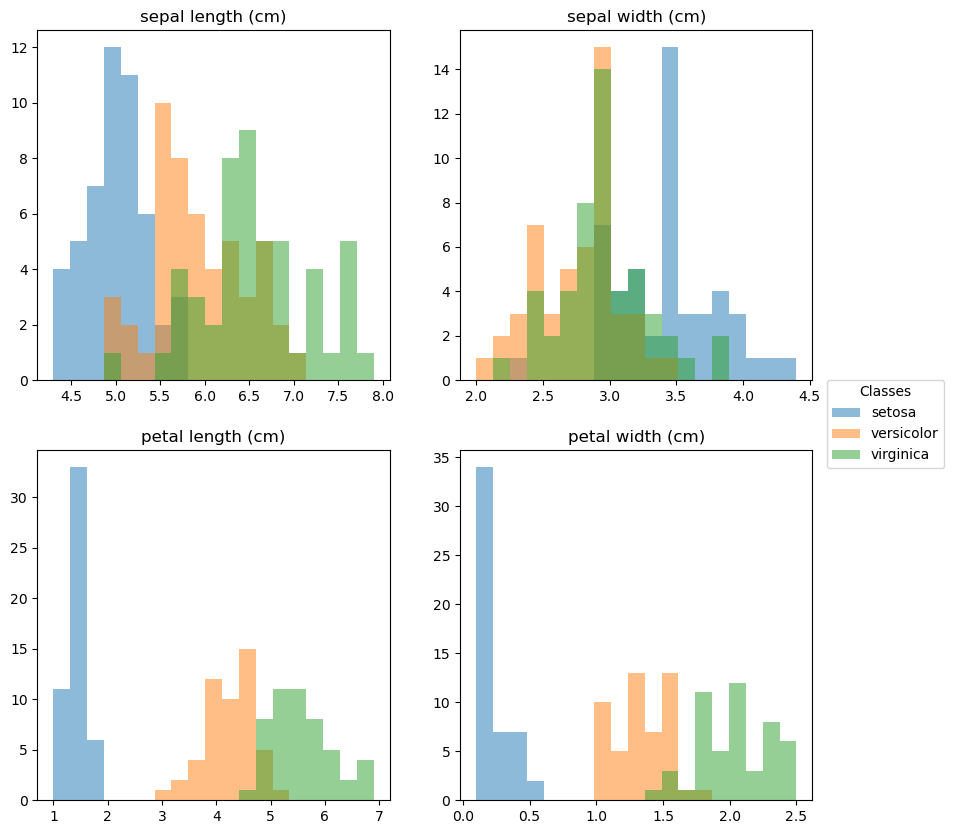

In [4]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()

data = dataset['data']
labels = dataset['target']
var_names = dataset['feature_names']
target_names = dataset['target_names']
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))


# loop on variables
for i in range(4):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.950), title="Classes")



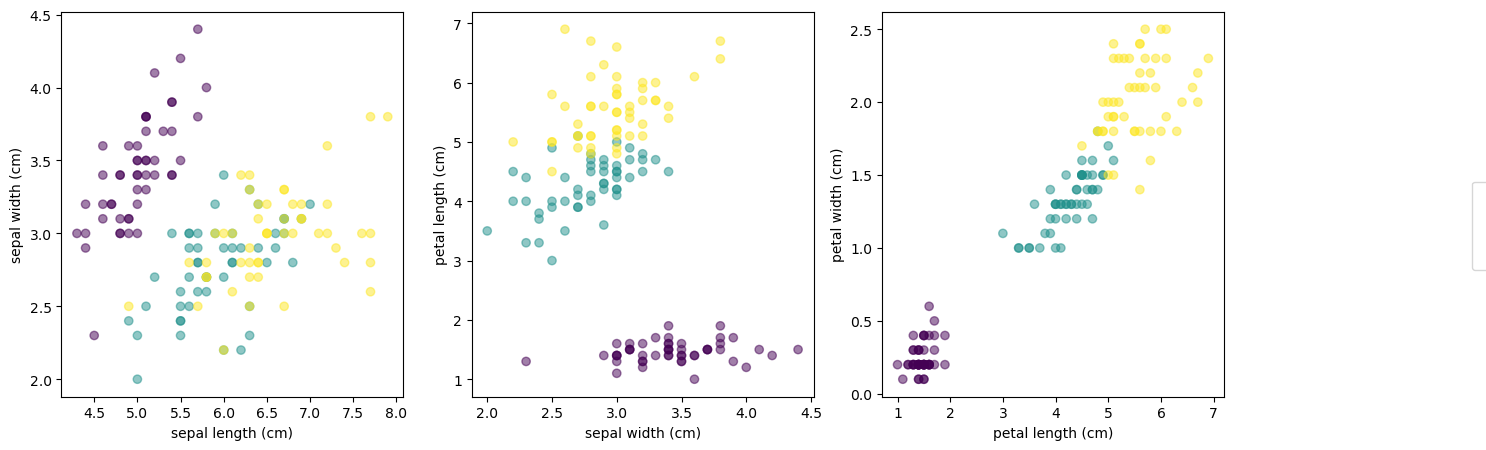

In [5]:


fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    j = i+1
    # we plot variable 1 vs 0, then 2 vs 1, then 3 vs 2
    scatter = axs[i].scatter(data[:,i], data[:, j], c=labels, alpha=0.5)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[j])
elems = list(scatter.legend_elements())
# by default, the legend labels are the values 
# of the target, 0, 1, 2. 
# we replace that with the target names:
elems[1] = target_names
fig.legend(*elems, loc=(0.99, 0.4), title="Classes")


Text(0.5, 1.0, 'Scatter Plot of Iris dataset')

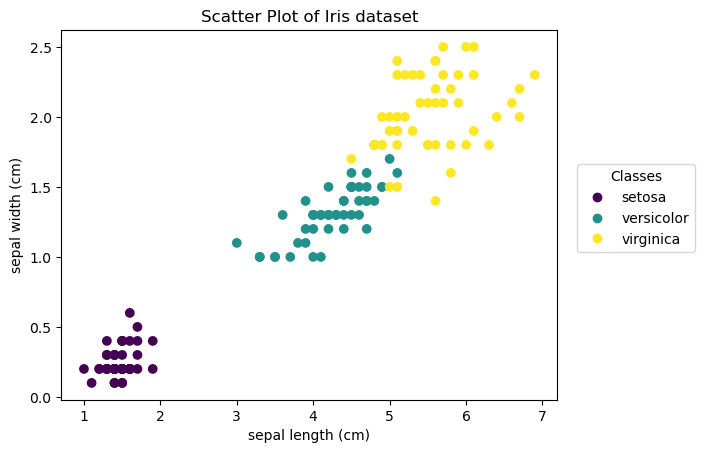

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc=(1.04, 0.4), title="Classes"
)



ax.set_title("Scatter Plot of Iris dataset")

Text(0.5, 1.0, 'Scatter Plot of Iris dataset')

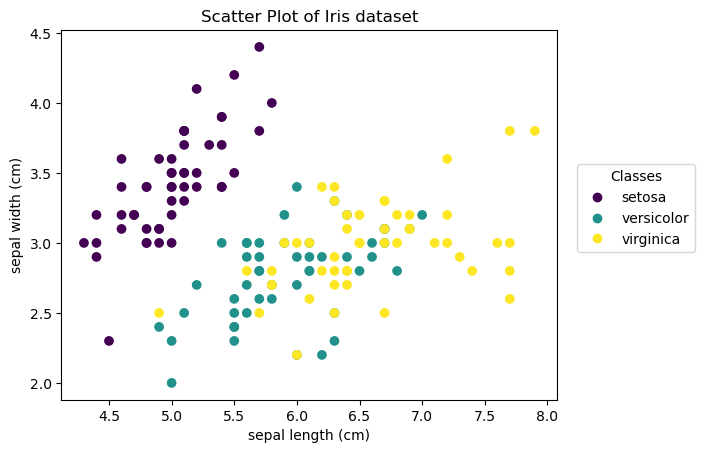

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc=(1.04, 0.4), title="Classes"
)



ax.set_title("Scatter Plot of Iris dataset")

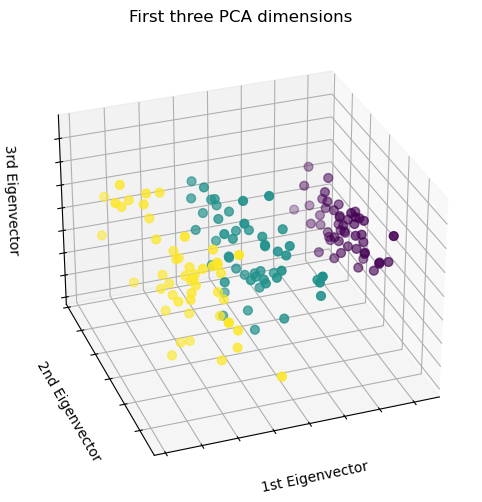

In [8]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [9]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

       zero       one  out
0  0.374540  0.294449    0
1  0.950714  0.385098    1
2  0.731994  0.851137    0
3  0.598658  0.316922    1
4  0.156019  0.169493    0
['zero', 'one', 'out']


Text(0.5, 1.0, 'Scatter Plot of Dummy dataset')

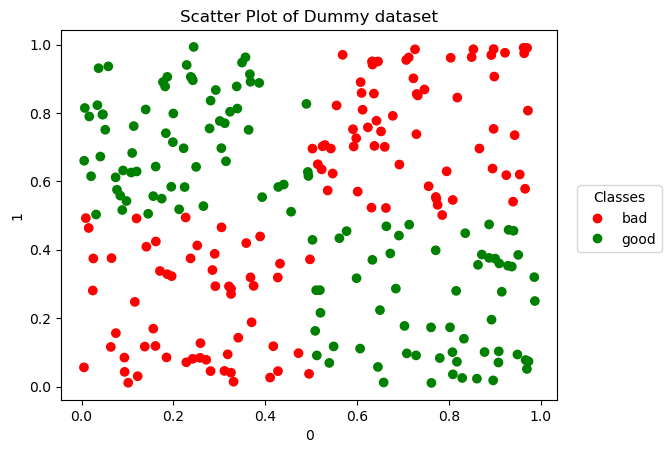

In [19]:

file_name = 'xor_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)
df.shape
print(df.head())
target_feature = 'label'

cols = list(df.columns)
print(cols)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots()
colors = ['red','green']
scatter = ax.scatter(df["zero"], df["one"], c=df.out, cmap=matplotlib.colors.ListedColormap(colors))
ax.set(xlabel="0", ylabel="1")
_ = ax.legend(
    scatter.legend_elements()[0], ["bad", "good"], loc=(1.04, 0.4), title="Classes", 
)
ax.set_title("Scatter Plot of Dummy dataset")

In [ ]:
file_name = 'dummy_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)
df.shape
print(df.head())
target_feature = 'out'

cols = list(df.columns)
print(cols)


         x1        x2  out
0  3.745401  6.981617    1
1  9.507143  5.360964    0
2  7.319939  3.095276    0
3  5.986585  8.137950    0
4  1.560186  6.847312    1
['x1', 'x2', 'out']


Text(0.5, 1.0, 'Scatter Plot of Dummy dataset')

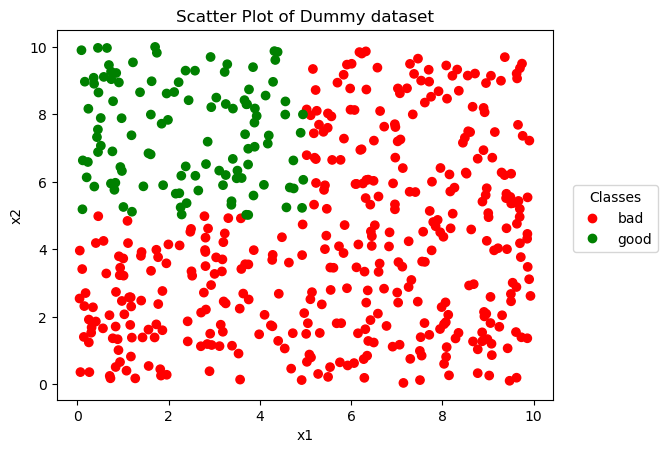

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots()
colors = ['red','green']
scatter = ax.scatter(df.x1, df.x2, c=df.out, cmap=matplotlib.colors.ListedColormap(colors))
ax.set(xlabel="x1", ylabel="x2")
_ = ax.legend(
    scatter.legend_elements()[0], ["bad", "good"], loc=(1.04, 0.4), title="Classes", 
)
ax.set_title("Scatter Plot of Dummy dataset")



['x1', 'x2']
[0 1]
['out']


IndexError: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 2

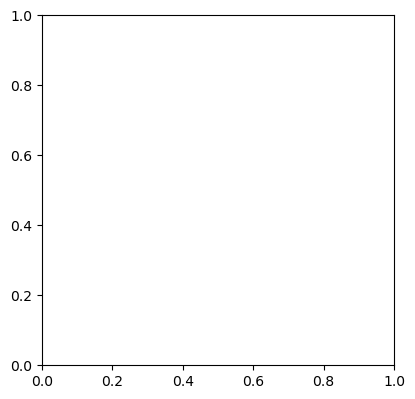

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets



data = df.to_numpy()
labels = [0,1]
var_names = ["x1", "x2"]
target_names = ["out"]
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))


# loop on variables
for i in range(4):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.950), title="Classes")

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


features = ['x1', 'x2']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['out'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=2).fit_transform(df)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
   # X_reduced[:, 2],
    c=df.out,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
file_name = 'dummy2_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)

['x1', 'x2']
[0 1]
['bad', 'good']


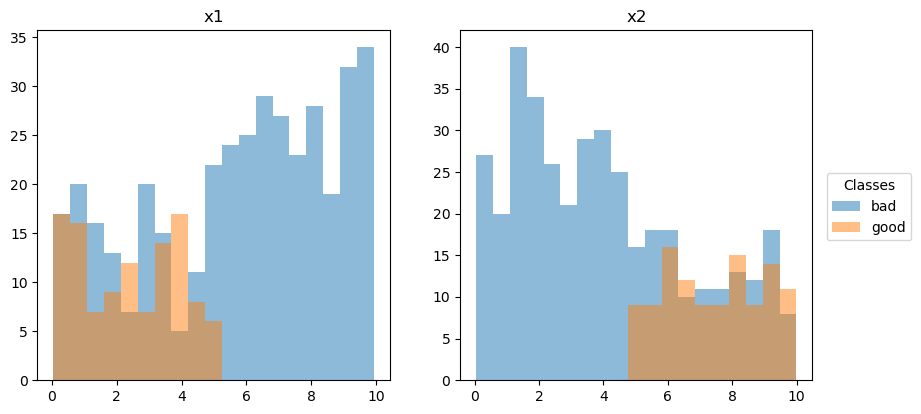

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()

data = df.to_numpy()
labels = df['out']
var_names = ["x1", "x2"]
target_names = ["bad","good"]
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))

cs = ["red","green"]
# loop on variables
for i in range(2):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.40), title="Classes")

